# 🔎 Análisis exploratorio del dataset Madrid Polution (2001- 2022)

Este proyecto utiliza el dataset “MadridPolution2001-2022.csv”, que contiene registros horarios de contaminantes atmosféricos medidos en la estación Escuelas Aguirre (Madrid) desde enero de 2001 hasta marzo de 2022. El objetivo principal es analizar la evolución de la calidad del aire en Madrid, identificando tendencias, picos y patrones estacionales en los principales contaminantes.

El dataset incluye las siguientes variables:
- **BEN**: Benceno (µg/m³)
- **CH4**: Metano (mg/m³)
- **CO**: Monóxido de carbono (mg/m³)
- **EBE**: Etilbenceno (µg/m³)
- **NMHC**: Hidrocarburos no metánicos (mg/m³)
- **NO**: Monóxido de nitrógeno (µg/m³)
- **NO2**: Dióxido de nitrógeno (µg/m³)
- **NOx**: Óxidos de nitrógeno (µg/m³)
- **O3**: Ozono (µg/m³)
- **PM10**: Partículas < 10 µm (µg/m³)
- **PM25**: Partículas < 2.5 µm (µg/m³)
- **SO2**: Dióxido de azufre (µg/m³)
- **TCH**: Hidrocarburos totales (mg/m³)
- **TOL**: Tolueno (µg/m³)

El análisis se centra en la evolución temporal, la comparación entre contaminantes y la identificación de patrones estacionales y extremos. Se proponen mejoras en los ejercicios para aprovechar la riqueza temporal y de variables del nuevo dataset.

## 🌱 Alba (limpieza y calidad de datos)

Convertimos la columna Time, originalmente en formato string, a tipo datetime para asegurar consistencia temporal y permitir análisis por fecha y hora. También creamos nuevas columnas (year, month, day, hour) a partir de la columna de fecha para facilitar el análisis exploratorio por periodos de tiempo.

In [89]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Cargar el dataset
csv_path = r"data/MadridPolution2001-2022.csv"

# Leer sin parsear fechas inicialmente para detectar el nombre de columna correcto
df = pd.read_csv(csv_path)

# --- LIMPIEZA DE FECHA ---
# La columna "time" la convertimos directamente a datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce") # Con errors="coerce"

# Verificamos si se han generado nulos al convertir la columna "Time" a formato datetime
print("Nulos en la columna Time después de la conversión: ", df["Time"].isna().sum())

# Creamos columnas auxiliares para explorar temporalmente el dataset, pero de momento no haremos una limpieza estricta
df["year"] = df["Time"].dt.year
df["month"] = df["Time"].dt.month
df["day"] = df["Time"].dt.day
df["hour"] = df["Time"].dt.hour


# Mostramos los resultados
print("Columnas detectadas en el CSV:", df.columns.tolist())
print("Dimensiones del dataset:", df.shape)
print(df.head(10))

Nulos en la columna Time después de la conversión:  0
Columnas detectadas en el CSV: ['Time', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TCH', 'TOL', 'year', 'month', 'day', 'hour']
Dimensiones del dataset: (172622, 19)
                       Time   BEN  CH4   CO  EBE  NMHC     NO   NO2    NOx  \
0 2001-01-01 00:00:00+00:00   4.0  NaN  0.0  2.0   NaN   66.0  67.0  168.0   
1 2001-01-01 01:00:00+00:00   9.0  NaN  0.0  5.0   NaN  146.0  71.0  294.0   
2 2001-01-01 02:00:00+00:00   9.0  NaN  0.0  5.0   NaN  190.0  73.0  364.0   
3 2001-01-01 03:00:00+00:00  10.0  NaN  0.0  5.0   NaN  170.0  75.0  335.0   
4 2001-01-01 04:00:00+00:00   8.0  NaN  0.0  4.0   NaN  102.0  67.0  224.0   
5 2001-01-01 05:00:00+00:00   3.0  NaN  1.0  2.0   NaN   63.0  60.0  157.0   
6 2001-01-01 06:00:00+00:00   2.0  NaN  0.0  1.0   NaN   28.0  47.0   90.0   
7 2001-01-01 07:00:00+00:00   2.0  NaN  1.0  1.0   NaN   33.0  43.0   93.0   
8 2001-01-01 08:00:00+00:00   2.0  N

Analizamos la presencia de valores nulos en todas las columnas y calculamos su porcentaje respecto al total de filas, identificando aquellas variables con mayor pérdida de información

In [90]:
# Contamos la cantidad de nulos que hay en cada columna
total_filas = len(df)

nulos_por_columna = df.isnull().sum()

conteo_de_nulos = nulos_por_columna.to_frame("Nulos").assign(Porcentaje=lambda x: (x["Nulos"] / total_filas * 100).round(2)).sort_values("Nulos", ascending=False)

print("--- Cantidad total de nulos en cada columna y porcentaje---")
print(conteo_de_nulos)

--- Cantidad total de nulos en cada columna y porcentaje---
       Nulos  Porcentaje
PM25   66570       38.56
NMHC   32649       18.91
TCH    32571       18.87
CH4    32569       18.87
TOL     8139        4.71
EBE     7835        4.54
BEN     7772        4.50
PM10    4393        2.54
O3      1725        1.00
SO2      767        0.44
NO       706        0.41
NOx      704        0.41
NO2      700        0.41
CO       435        0.25
month      0        0.00
day        0        0.00
Time       0        0.00
year       0        0.00
hour       0        0.00


Añadimos un gráfico de barras para poder representar de forma más visual cuales son las columnas que tienen una mayor cantidad de nulos en sus filas

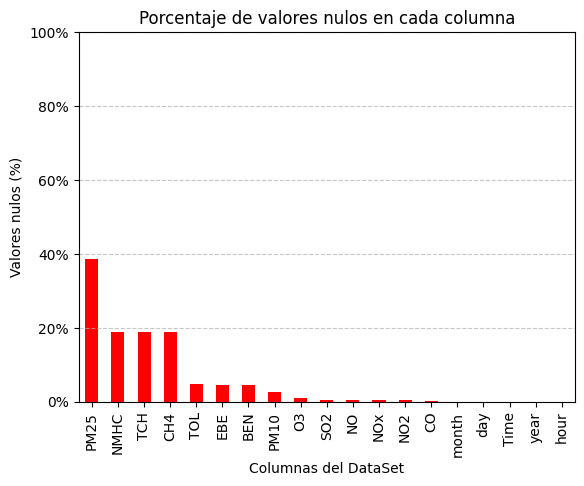

In [91]:
conteo_de_nulos['Porcentaje'].plot(kind="bar", color='red', legend=False)
plt.title("Porcentaje de valores nulos en cada columna")
plt.xlabel("Columnas del DataSet")
plt.ylabel("Valores nulos (%)")

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 100)
ejes = plt.gca()
ejes.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y)}%'))
plt.show()

En base a los resultados, podemos comprobar que la columna que tiene un mayor valor de nulos es la de `PM25`, con casi un 40% de valores nulos. Después, tenemos otras tres columnas con un porcentaje de valores nulos por debajo del 20% que serían `NMHC`, `TCH` y `CH4`. Después, el resto de columnas tienen porcentajes de nulos muy bajos y en caso de las columnas que representan la fecha (`Time`, `year`, `month`, `day`, `hour`) tienen un porcentaje del 0%, por lo que a pesar de que haya contaminantes con un porcentaje de nulos más o menos alto, podremos realizar un análasis temporal completo, ya que tenemos todos los valores con fecha y hora.

Comprobamos la existencia de filas duplicadas en el dataset y evaluamos su impacto, eliminándolas en caso de ser necesario para evitar sesgos en el análisis.

In [92]:
duplicados = df.duplicated().sum()
print(f"Numero de filas duplicadas: {duplicados}")

# En caso de que detectase algún duplicado, con el método drop_duplicates eliminaría la columna entera
if duplicados > 0:
    df.drop_duplicates()
    print("Duplicados eliminados. Nuevo tamaño del dataset: ", df.shape)

Numero de filas duplicadas: 0


Revisamos los tipos de datos de cada columna para asegurar que las variables numéricas se encuentren en formato correcto (float/int) y no en formato texto, evitando errores en el procesamiento posterior.

In [93]:
print("\nTipos de datos detectados en el dataset:")
print(df.dtypes)

# Comprobamos si hay columnas numéricas cargadas como texto
numeric_cols = df.select_dtypes(include=["object"]).columns
print("\nColumnas tipo 'object' (texto):", numeric_cols.tolist())


Tipos de datos detectados en el dataset:
Time     datetime64[ns, UTC]
BEN                  float64
CH4                  float64
CO                   float64
EBE                  float64
NMHC                 float64
NO                   float64
NO2                  float64
NOx                  float64
O3                   float64
PM10                 float64
PM25                 float64
SO2                  float64
TCH                  float64
TOL                  float64
year                   int32
month                  int32
day                    int32
hour                   int32
dtype: object

Columnas tipo 'object' (texto): []


Analizamos si existen valores anómalos o fuera de rango en las variables (ej. concentraciones negativas o valores extremadamente altos) para garantizar la coherencia de las mediciones.

In [94]:
# Buscar valores negativos en las columnas numéricas
negativos = (df.select_dtypes(include=["float64", "int64"]) < 0).sum()
print("\nValores negativos por columna:")
print(negativos[negativos > 0])

# Ver rango de cada variable (mínimo y máximo)
rangos = df.describe().T[["min", "max"]]
print("\nRangos de valores por columna:")
print(rangos)


Valores negativos por columna:
Series([], dtype: int64)

Rangos de valores por columna:
          min     max
BEN       0.0    43.0
CH4       0.0     4.0
CO        0.0    10.0
EBE       0.0    81.0
NMHC      0.0     9.0
NO        1.0  1041.0
NO2       4.0   402.0
NOx       5.0  1910.0
O3        0.0   199.0
PM10      1.0   367.0
PM25      0.0   215.0
SO2       1.0   158.0
TCH       0.0    10.0
TOL       0.0   174.0
year   2001.0  2022.0
month     1.0    12.0
day       1.0    31.0
hour      0.0    23.0


## 📊 Robert (análisis general y descriptivo)

- Promedio anual: ¿Cuál es la concentración media de cada contaminante por año? (tabla resumen por año y contaminante).
- Mejora: Visualizar la evolución anual de los principales contaminantes con gráficos de líneas.


,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
año,,,,,,,,,,,,,,
2001,4.43,NaN,0.59,3.27,NaN,84.68,74.08,203.94,26.10,39.09,NaN,14.60,NaN,14.59
2002,NaN,1.02,0.70,NaN,0.00,119.34,74.65,257.59,12.62,35.45,NaN,18.41,1.09,NaN
2003,0.83,1.01,0.31,1.29,0.00,72.71,74.62,186.11,30.04,33.04,NaN,15.57,1.04,8.96
2004,0.72,1.01,0.24,1.27,0.00,73.16,76.49,188.67,28.17,32.62,NaN,13.99,1.04,8.84
2005,0.17,1.01,0.15,0.79,0.01,63.02,76.75,173.36,29.12,32.91,NaN,13.29,1.06,3.43
2006,0.09,0.88,0.09,0.45,0.01,59.73,72.10,163.66,29.89,41.12,NaN,12.12,1.03,4.27
2007,0.32,0.97,0.09,0.95,0.01,57.06,68.44,155.93,28.33,34.90,NaN,13.13,1.03,6.16
2008,0.22,0.98,0.05,0.77,0.00,41.73,63.29,127.28,31.84,27.27,NaN,12.41,1.01,5.26
2009,0.25,1.01,0.03,0.78,0.00,39.15,54.24,114.39,39.80,28.17,15.59,11.97,1.02,5.00


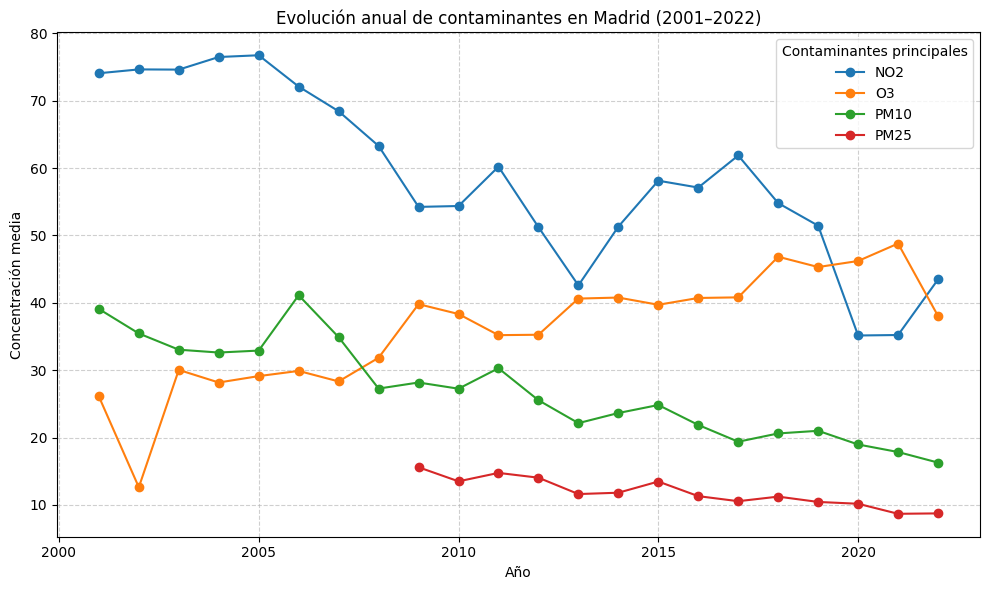

In [95]:
# Renombrar la columna de fecha a 'date' para homogeneidad
if date_col != "date":
    df = df.rename(columns={date_col: "date"})

# Asegurar que la columna 'date' esté en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df["date"]):
    df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# Añadir columnas de año, mes, día y hora para análisis temporales
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

# Agrupamos todos los datos en años, pasando de 2001-01-01 00:00:00+00:00 a los años correspondientes
df["año"] = df["date"].dt.year

# Creamos una lista con todos los contaminantes que se recogen
contaminantes = ["BEN","CH4","CO","EBE","NMHC","NO","NO2","NOx","O3","PM10","PM25","SO2","TCH","TOL"]

# Agrupamos todos los datos de todos los contaminantes en años y entre todos los datos sacamos su media correspondiente
resumen = df.groupby("año")[contaminantes].mean().round(2)

# Mostramos los datos
display(resumen)

# Para la mejora de este apartado, creamos una lista con la selección de los principales contaminantes
principales = ["NO2", "O3", "PM10", "PM25"]

# Filtrar el resumen solo a esos contaminantes
resumen_principales = resumen[principales]

# Creamos el gráfico y lo mostramos
plt.figure(figsize=(10,6))
for col in resumen_principales.columns:
    plt.plot(resumen_principales.index, resumen_principales[col], marker="o", label=col)

plt.title("Evolución anual de contaminantes en Madrid (2001–2022)")
plt.xlabel("Año")
plt.ylabel("Concentración media")
plt.legend(title="Contaminantes principales")
# Mostramos el gráfico con delimitadores para mayor visibilidad
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

- Mes con peor calidad del aire: ¿Qué mes tuvo la media más alta de NO₂ cada año? (gráfico de barras mensual por año).
- Mejora: Mostrar el mes más crítico para cada año y visualizar la tendencia mensual agregada.

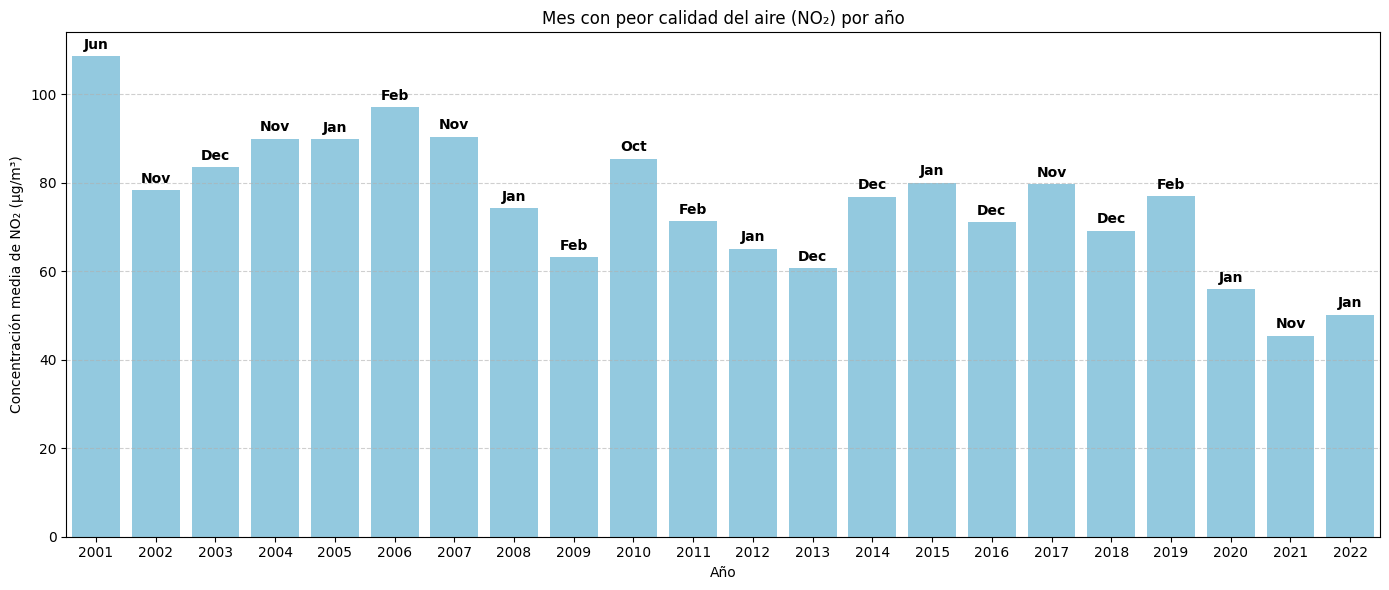

In [96]:
# ---------- LIMPIEZA DE DATOS ----------
# Convertimos NO2 de Float a Int
df["NO2"] = pd.to_numeric(df["NO2"], errors="coerce")

# Eliminamos filas donde NO2 o date sean NaN
df = df.dropna(subset=["date", "NO2"])

# Agrupamos los datos de date por mes
df["mes"] = df["date"].dt.month

# Obtenemos la media mensual de dióxido de nitrógeno NO2
mensual_no2 = df.groupby(["año", "mes"])["NO2"].mean().reset_index()

# Obtenemos el mes con peor promedio de cada año
peor_mes_anual = mensual_no2.loc[mensual_no2.groupby("año")["NO2"].idxmax()].copy()

# Agregar el nombre del mes
peor_mes_anual["mes_nombre"] = peor_mes_anual["mes"].apply(lambda x: calendar.month_abbr[x])

# Gráfico
plt.figure(figsize=(14,6))
ax = sns.barplot(data=peor_mes_anual, x="año", y="NO2", dodge=False, color="skyblue")

# Añadir el nombre del mes encima de cada barra
for p, mes in zip(ax.patches, peor_mes_anual["mes_nombre"]):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,  # posición horizontal: centro de la barra
        height + 1,                    # posición vertical: un poco arriba de la barra
        mes,                           # texto a mostrar
        ha="center",                   # centrar el texto horizontalmente
        va="bottom",                   # alinear el texto al fondo
        fontsize=10,
        fontweight="bold"
    )

plt.title("Mes con peor calidad del aire (NO₂) por año")
plt.xlabel("Año")
plt.ylabel("Concentración media de NO₂ (µg/m³)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

- Distribución de O₃: ¿Cuál es el rango de concentraciones de O₃ más frecuente? (histograma global y por año).
- Mejora: Analizar la variabilidad anual y estacional de O₃.

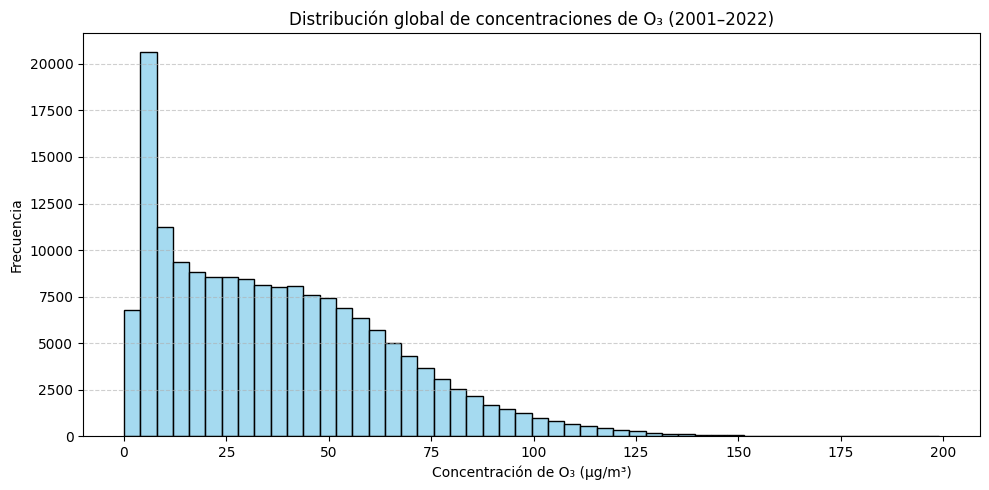

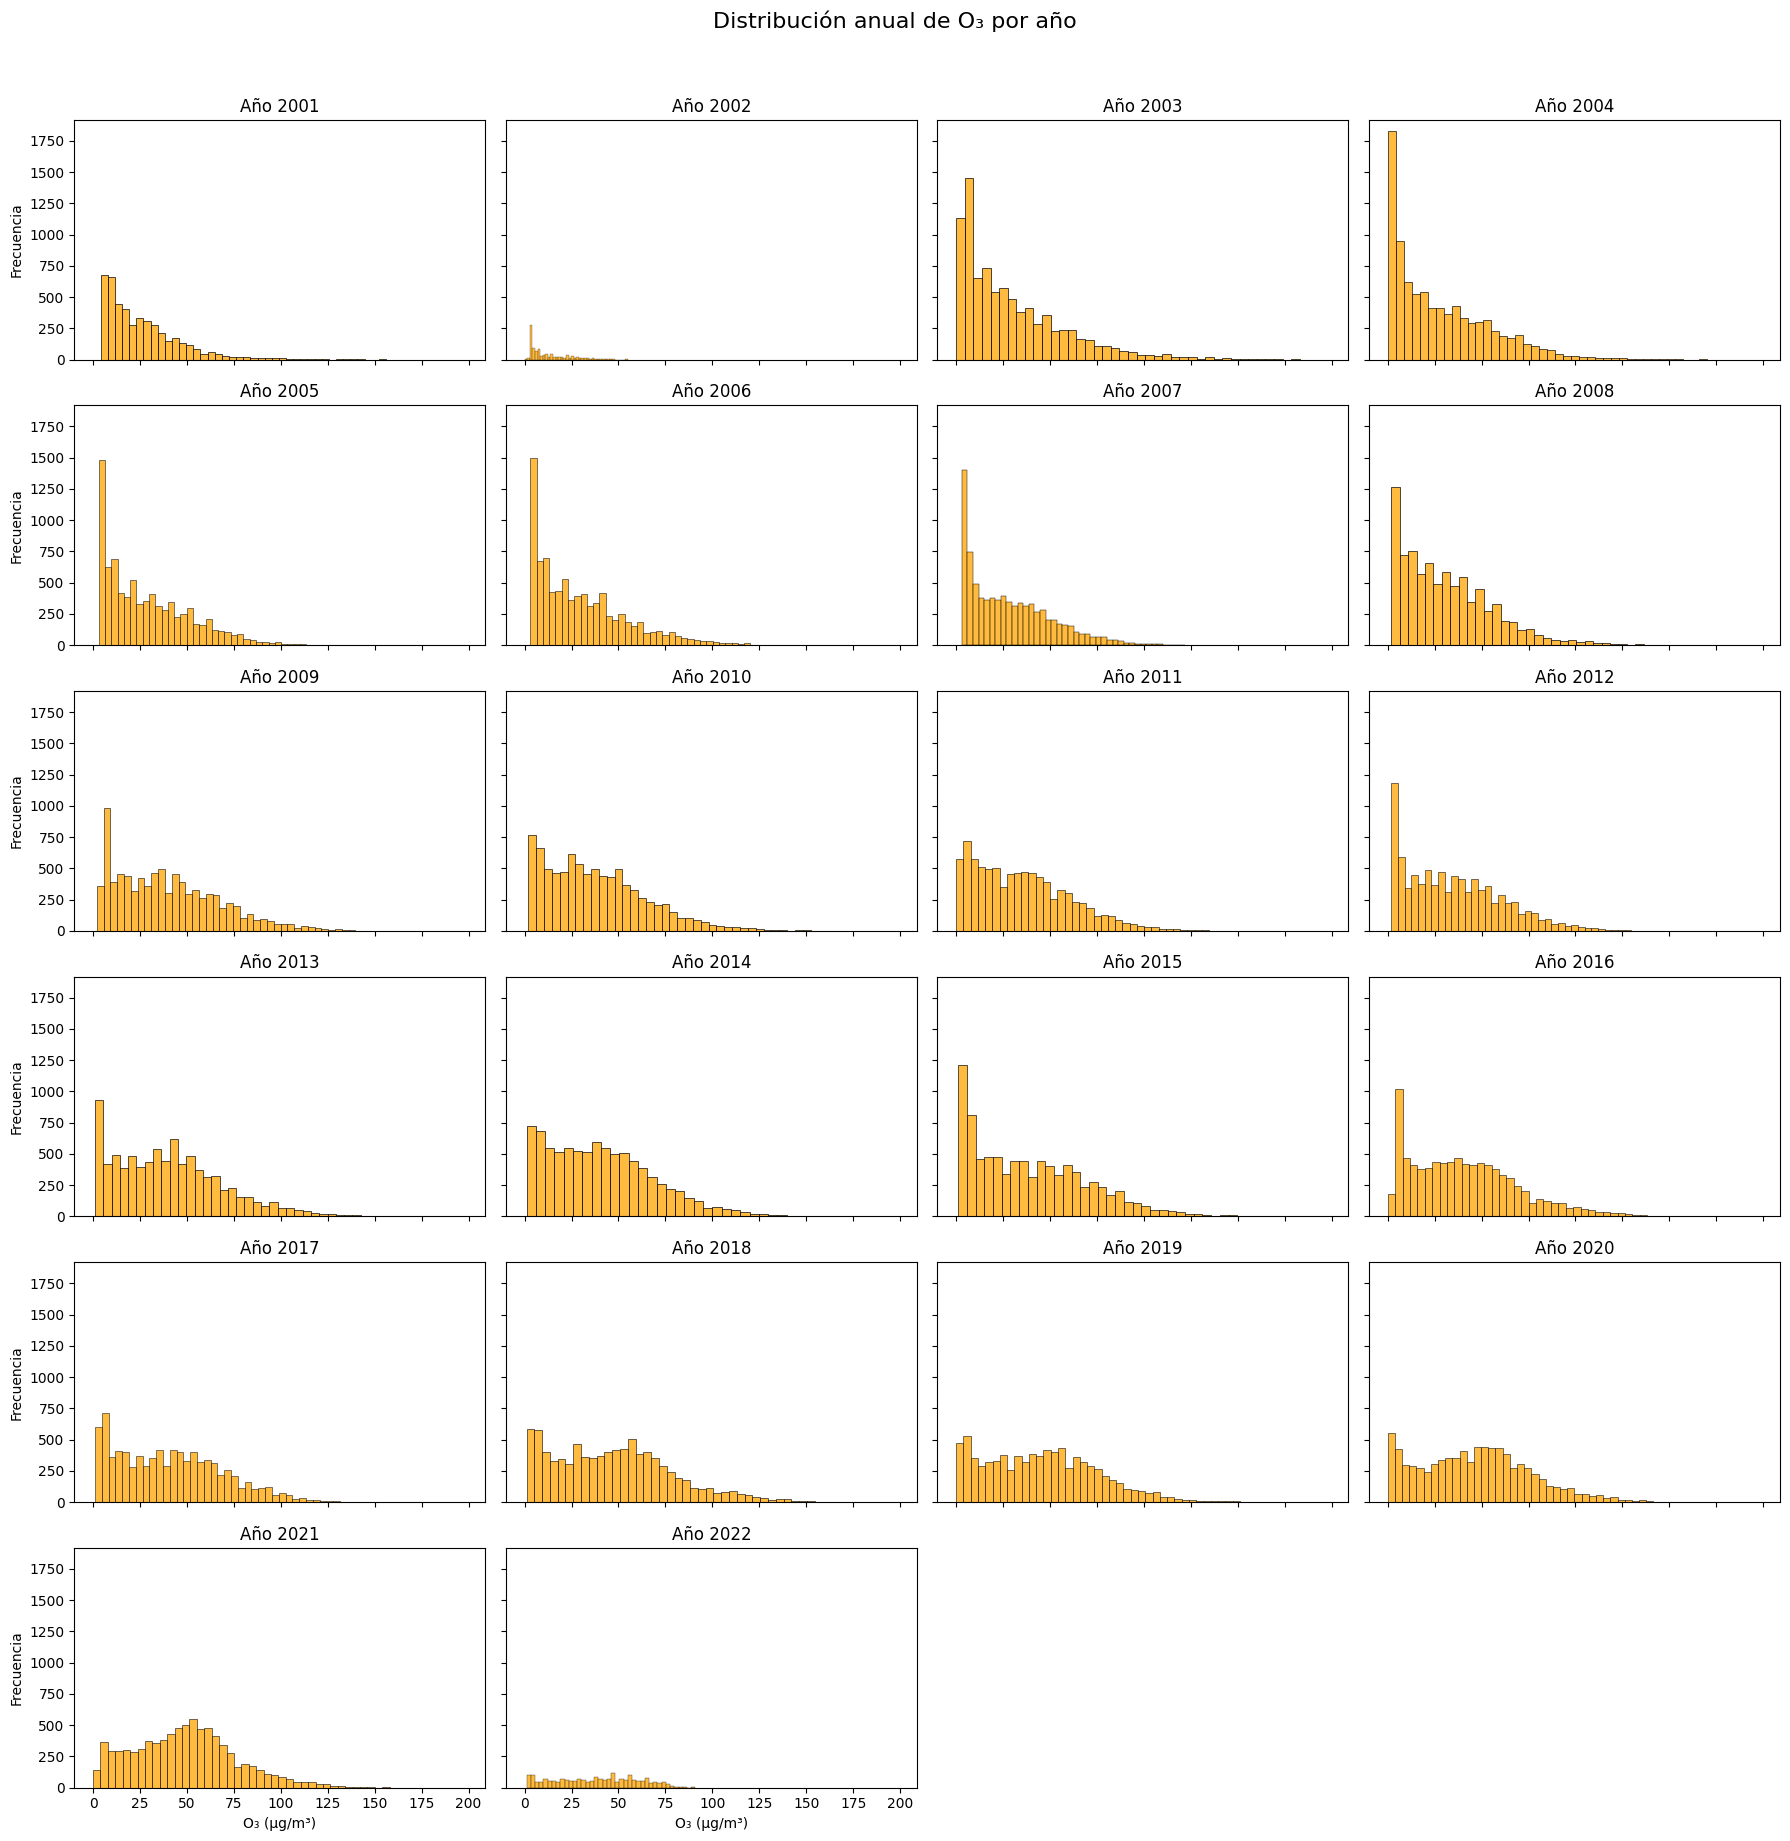

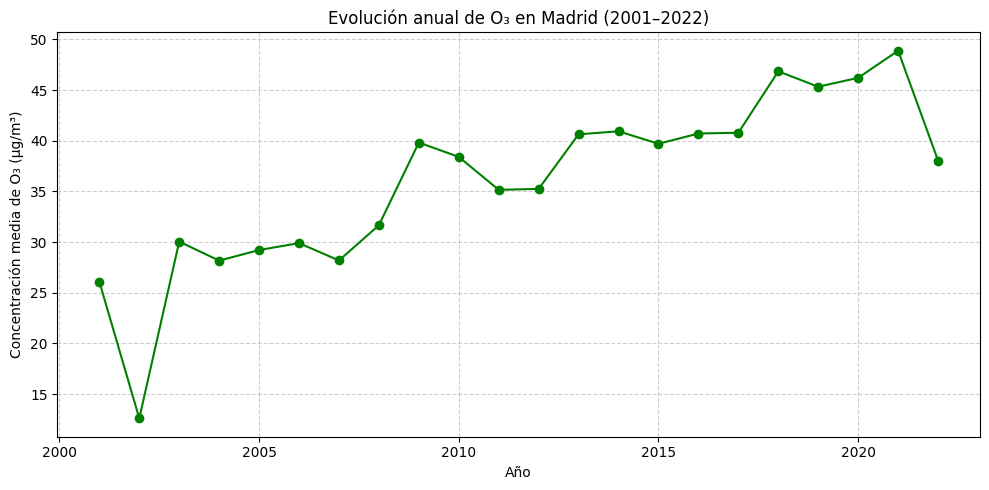

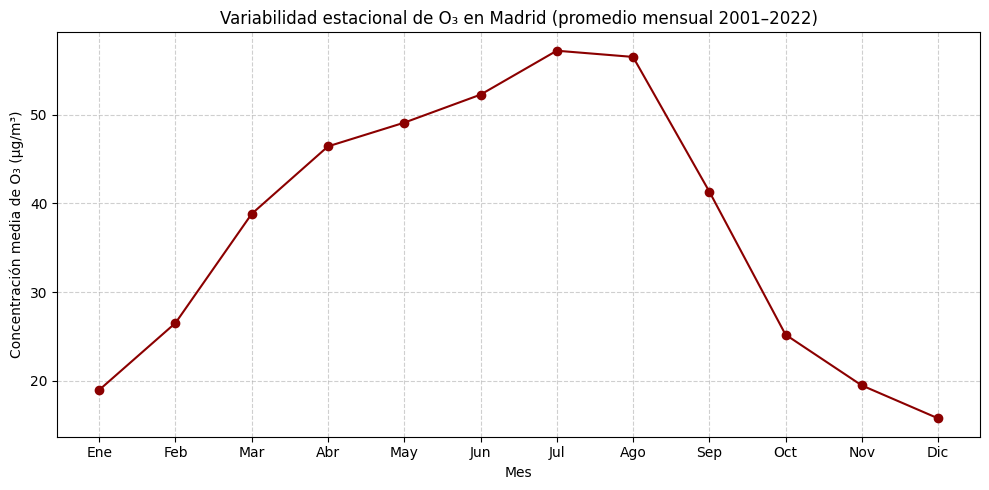

In [97]:
# Histograma global de O3
plt.figure(figsize=(10,5))
sns.histplot(df["O3"].dropna(), bins=50, color="skyblue")
plt.xlabel("Concentración de O₃ (µg/m³)")
plt.ylabel("Frecuencia")
plt.title("Distribución global de concentraciones de O₃ (2001–2022)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Histograma por año
years = sorted(df["year"].unique())
n_years = len(years)

fig, axes = plt.subplots(n_years//4 + 1, 4, figsize=(18, 3*(n_years//4 + 1)), sharex=True, sharey=True)
axes = axes.flatten()

for i, y in enumerate(years):
    sns.histplot(df.loc[df["year"] == y, "O3"].dropna(), bins=40, color="orange", ax=axes[i])
    axes[i].set_title(f"Año {y}")
    axes[i].set_xlabel("O₃ (µg/m³)")
    axes[i].set_ylabel("Frecuencia")

# Eliminar subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribución anual de O₃ por año", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# A partir de la media, obtenemos la evolución anual de O3
o3_anual = df.groupby("year")["O3"].mean()

plt.figure(figsize=(10,5))
plt.plot(o3_anual.index, o3_anual.values, marker="o", color="green")
plt.xlabel("Año")
plt.ylabel("Concentración media de O₃ (µg/m³)")
plt.title("Evolución anual de O₃ en Madrid (2001–2022)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Variabilidad estacional (promedio mensual de todos los años)
o3_mensual = df.groupby("month")["O3"].mean()

plt.figure(figsize=(10,5))
plt.plot(o3_mensual.index, o3_mensual.values, marker="o", color="darkred")
plt.xticks(range(1,13), ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.xlabel("Mes")
plt.ylabel("Concentración media de O₃ (µg/m³)")
plt.title("Variabilidad estacional de O₃ en Madrid (promedio mensual 2001–2022)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


- Picos diarios: ¿Qué día presentó la concentración más alta de PM10 en cada año?
- Mejora: Visualizar los días de picos extremos y analizar si hay patrones estacionales o de eventos puntuales.

,year,date,PM10
53,2001,2001-02-23,110.583333
201,2002,2002-11-27,80.250000
581,2003,2003-12-12,124.375000
805,2004,2004-07-23,110.916667
1045,2005,2005-03-20,121.625000
1368,2006,2006-02-10,135.666667
1711,2007,2007-01-19,95.739130
2336,2008,2008-10-12,71.875000
2557,2009,2009-05-21,60.166667
2860,2010,2010-03-20,135.541667


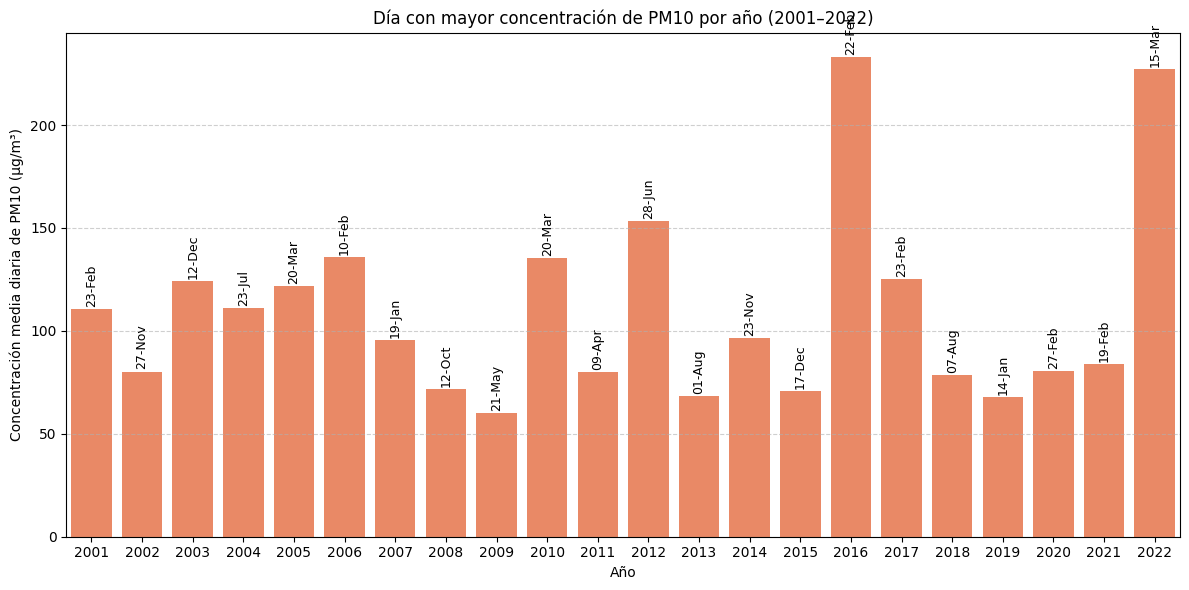

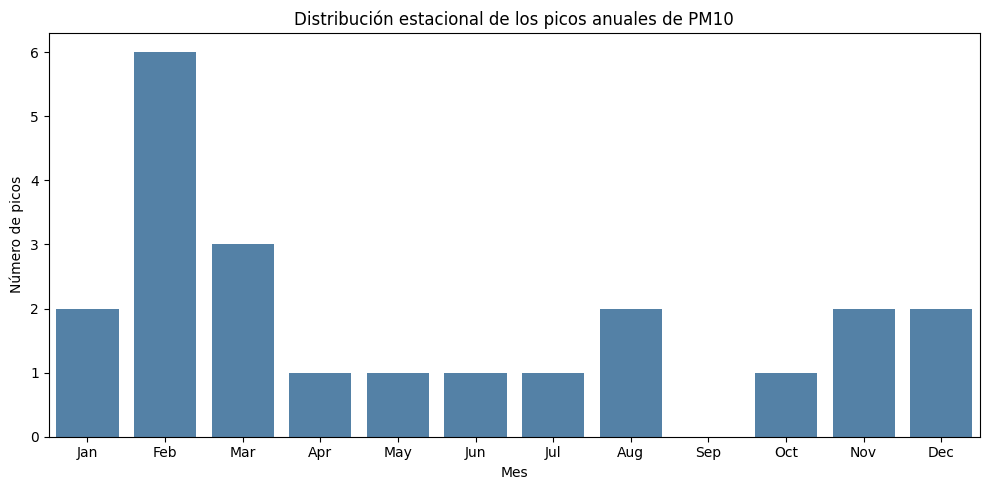

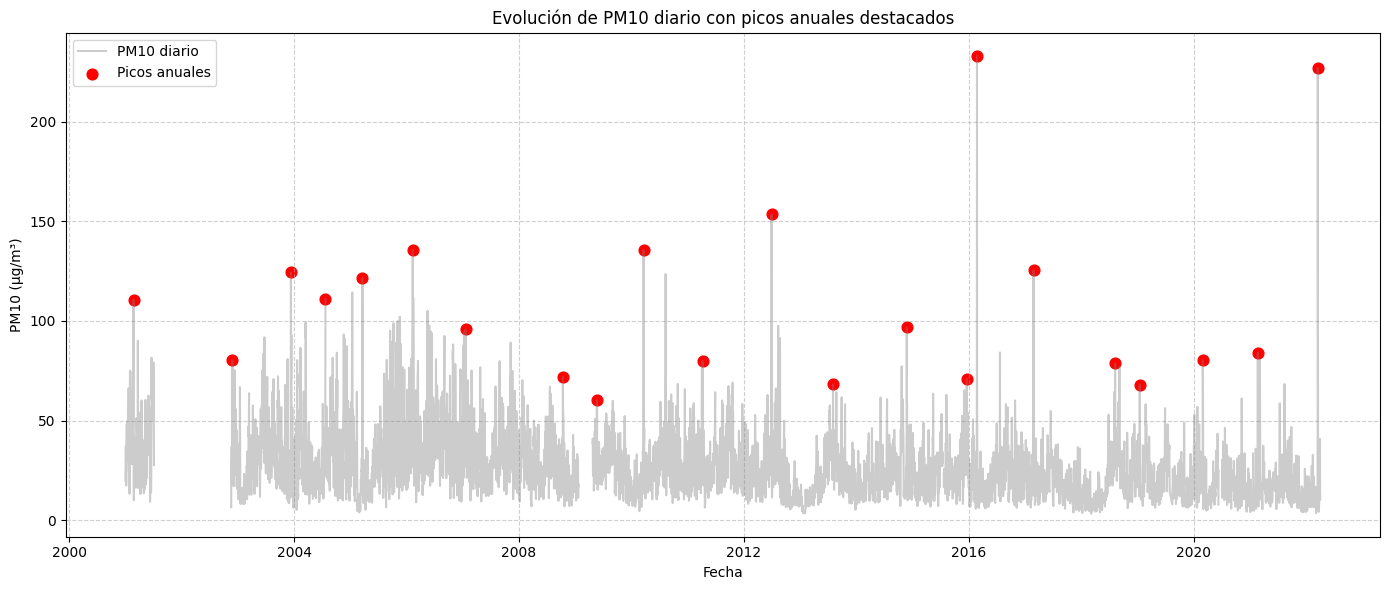

In [98]:
# Primero calculamos la media diaria de PM10
pm10_diario = df.groupby(df["date"].dt.date)["PM10"].mean().reset_index()
pm10_diario["date"] = pd.to_datetime(pm10_diario["date"])
pm10_diario["year"] = pm10_diario["date"].dt.year
pm10_diario["month"] = pm10_diario["date"].dt.month

# Obtenemos el día con mayor PM10 en cada año
pico_anual_pm10 = pm10_diario.loc[pm10_diario.groupby("year")["PM10"].idxmax()].copy()

# Mostramos una tabla de resultados
display(pico_anual_pm10[["year", "date", "PM10"]])

# Visualización de picos anuales
plt.figure(figsize=(12,6))
sns.barplot(data=pico_anual_pm10, x="year", y="PM10", color="coral")

# Anotar la fecha exacta sobre cada barra
for p, fecha in zip(plt.gca().patches, pico_anual_pm10["date"].dt.strftime("%d-%b")):
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 1, fecha,
             ha="center", va="bottom", fontsize=9, rotation=90)

plt.title("Día con mayor concentración de PM10 por año (2001–2022)")
plt.xlabel("Año")
plt.ylabel("Concentración media diaria de PM10 (µg/m³)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ---------- DISTRIBUCIÓN ESTACIONAL DE PICOS ----------

# Extraemos solo el mes de los picos
pico_anual_pm10["mes_nombre"] = pico_anual_pm10["month"].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(10,5))
sns.countplot(data=pico_anual_pm10, x="mes_nombre", order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], color="steelblue")
plt.title("Distribución estacional de los picos anuales de PM10")
plt.xlabel("Mes")
plt.ylabel("Número de picos")
plt.tight_layout()
plt.show()

# Creamos una línea temporal con todos los máximos diarios
plt.figure(figsize=(14,6))
plt.plot(pm10_diario["date"], pm10_diario["PM10"], alpha=0.4, color="gray", label="PM10 diario")
plt.scatter(pico_anual_pm10["date"], pico_anual_pm10["PM10"], color="red", s=60, label="Picos anuales")
plt.title("Evolución de PM10 diario con picos anuales destacados")
plt.xlabel("Fecha")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 🌍 David (comparaciones y correlaciones)

- Estacionalidad en un año: ¿Qué contaminante presenta mayores diferencias entre invierno y verano?
- Mejora: Analizar la estacionalidad de todos los contaminantes y visualizar la diferencia entre estaciones.

- Correlación: ¿Existe correlación entre los niveles diarios de NO₂ y CO en el periodo analizado?
- Mejora: Analizar correlaciones entre más contaminantes y visualizar la matriz de correlación.

- Laborables vs fines de semana: ¿Hay diferencias en los niveles de NO₂ promedio entre días laborables y fines de semana?
- Mejora: Analizar diferencias para más contaminantes y visualizar la variación semanal.

- Variación horaria: ¿A qué horas del día se concentran los picos de NO₂ en promedio durante el año? (curva horaria).
- Mejora: Analizar la variación horaria de más contaminantes y comparar entre años.